In [1]:
print("hello world")


hello world


In [15]:
df

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Date_Time,,,,,
2024-01-01 00:00:06,Phoenix,0.618582,46.871717,7.379615,5.321995
2024-01-01 00:00:06,Houston,39.469465,34.789904,9.807685,20.475434
2024-01-01 00:00:15,Los Angeles,35.920611,80.786237,0.859060,21.634439
2024-01-01 00:00:18,San Antonio,32.048197,45.576250,2.894071,23.335641
2024-01-01 00:00:31,San Diego,-8.090262,81.472454,5.435076,7.609853
...,...,...,...,...,...
2024-05-18 19:43:30,Chicago,-1.561114,35.861711,8.802004,7.852678
2024-05-18 19:43:50,Philadelphia,8.597967,88.073644,5.137802,21.671935
2024-05-18 19:43:55,New York,7.679884,89.701606,6.760624,21.417264


In [7]:
# pip install pandas numpy matplotlib statsmodels pmdarima prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("weather_data.csv", parse_dates=["Date_Time"])

# Sort by date-time
df = df.sort_values("Date_Time")

# Set date-time as index
df.set_index("Date_Time", inplace=True)

# Filter for a single location (e.g., New York)
df_ny = df[df["Location"] == "New York"]

# Select a variable to forecast (e.g., Temperature)
df_ny = df_ny[["Temperature_C"]]


In [5]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("✅ Data is stationary")
    else:
        print("❌ Data is NOT stationary. Differencing is needed.")

check_stationarity(df_ny["Temperature_C"])


ADF Statistic: -120.27546526113977
p-value: 0.0
✅ Data is stationary


/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: N

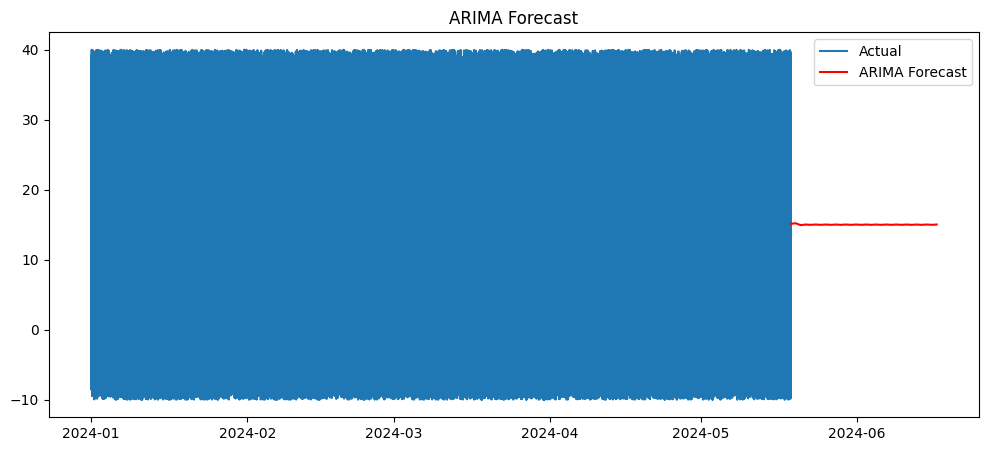

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (p, d, q) - you can tune these values
arima_model = ARIMA(df_ny, order=(5,1,2))  # (p,d,q)
arima_result = arima_model.fit()

# Forecast future values
forecast_arima = arima_result.forecast(steps=30)  # Predict next 30 days

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(df_ny.index, df_ny, label="Actual")
plt.plot(pd.date_range(df_ny.index[-1], periods=30, freq="D"), forecast_arima, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()



/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: 

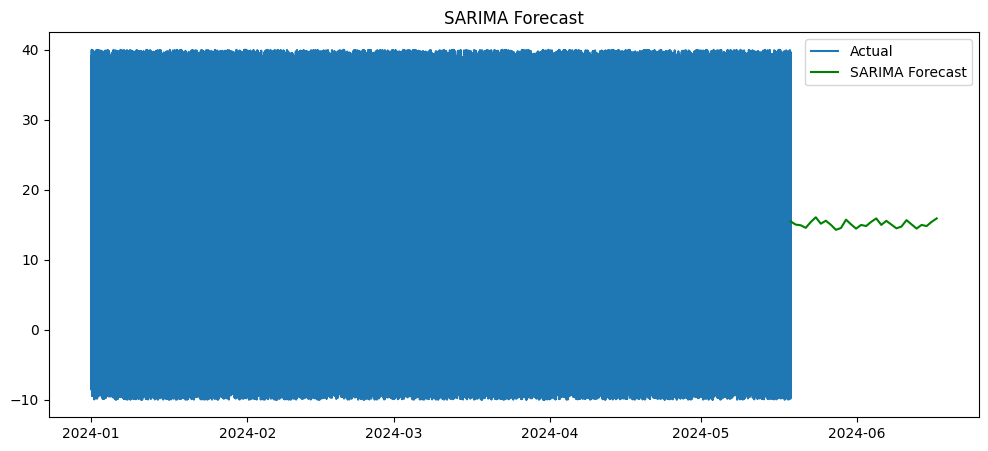

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model (p,d,q)(P,D,Q,s)
sarima_model = SARIMAX(df_ny["Temperature_C"], order=(5,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

# Forecast
forecast_sarima = sarima_result.forecast(steps=30)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_ny.index, df_ny["Temperature_C"], label="Actual")
plt.plot(pd.date_range(df_ny.index[-1], periods=30, freq="D"), forecast_sarima, label="SARIMA Forecast", color="green")
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


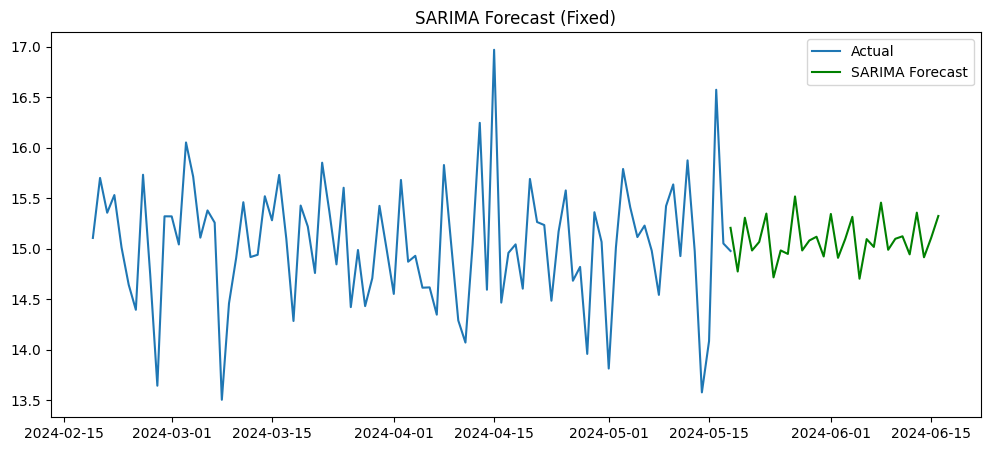

In [10]:
# Downsample data to daily averages to reduce plot density
df_ny_resampled = df_ny.resample('D').mean()

# Re-train SARIMA with resampled data
sarima_model = SARIMAX(df_ny_resampled["Temperature_C"], order=(5,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

# Forecast
forecast_sarima = sarima_result.forecast(steps=30)

# Plot only recent data (last 90 days) to make it readable
plt.figure(figsize=(12, 5))
plt.plot(df_ny_resampled.index[-90:], df_ny_resampled["Temperature_C"].iloc[-90:], label="Actual")
plt.plot(pd.date_range(df_ny_resampled.index[-1], periods=30, freq="D"), forecast_sarima, label="SARIMA Forecast", color="green")
plt.legend()
plt.title("SARIMA Forecast (Fixed)")
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniconda/base/envs/supply/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


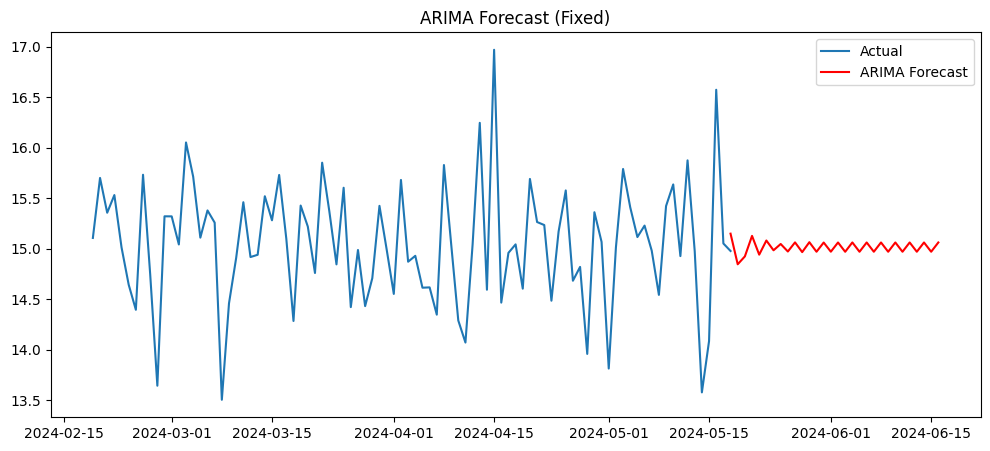

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Downsample data to daily averages to reduce plot density
df_ny_resampled = df_ny.resample('D').mean()

# Train ARIMA model on resampled data
arima_model = ARIMA(df_ny_resampled["Temperature_C"], order=(5,1,2))  # (p,d,q) can be tuned further
arima_result = arima_model.fit()

# Forecast future values
forecast_arima = arima_result.forecast(steps=30)

# Plot only the last 90 days to improve readability
plt.figure(figsize=(12, 5))
plt.plot(df_ny_resampled.index[-90:], df_ny_resampled["Temperature_C"].iloc[-90:], label="Actual")
plt.plot(pd.date_range(df_ny_resampled.index[-1], periods=30, freq="D"), forecast_arima, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast (Fixed)")
plt.show()




In [18]:
print(df.head())  # See what the first few rows look like




                        Location  Temperature_C  Humidity_pct  \
Date_Time                                                       
2024-01-01 00:00:06      Phoenix       0.618582     46.871717   
2024-01-01 00:00:06      Houston      39.469465     34.789904   
2024-01-01 00:00:15  Los Angeles      35.920611     80.786237   
2024-01-01 00:00:18  San Antonio      32.048197     45.576250   
2024-01-01 00:00:31    San Diego      -8.090262     81.472454   

                     Precipitation_mm  Wind_Speed_kmh  
Date_Time                                              
2024-01-01 00:00:06          7.379615        5.321995  
2024-01-01 00:00:06          9.807685       20.475434  
2024-01-01 00:00:15          0.859060       21.634439  
2024-01-01 00:00:18          2.894071       23.335641  
2024-01-01 00:00:31          5.435076        7.609853  


In [19]:
df = df.reset_index()


In [24]:
print(df_resampled.columns)


Index(['ds', 'y', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'], dtype='object')


In [23]:
df["Date"] = df["Date_Time"].dt.date  # Create a new column for the date
df_resampled = df.drop(columns=["Location", "Date_Time"]).groupby("Date").mean().reset_index()
df_resampled.rename(columns={"Date": "ds", "Temperature_C": "y"}, inplace=True)




In [69]:
# from prophet import Prophet

prophet_model = Prophet(changepoint_prior_scale=0.1, 
                       seasonality_mode="multiplicative", 
                       interval_width=0.95)

prophet_model.add_seasonality(name="yearly", period=365, fourier_order=10)
prophet_model.add_seasonality(name="monthly", period=30, fourier_order=5)
prophet_model.add_seasonality(name="weekly", period=7, fourier_order=3)

prophet_model.fit(df_resampled)

14:51:57 - cmdstanpy - INFO - Chain [1] start processing
14:51:57 - cmdstanpy - INFO - Chain [1] done processing


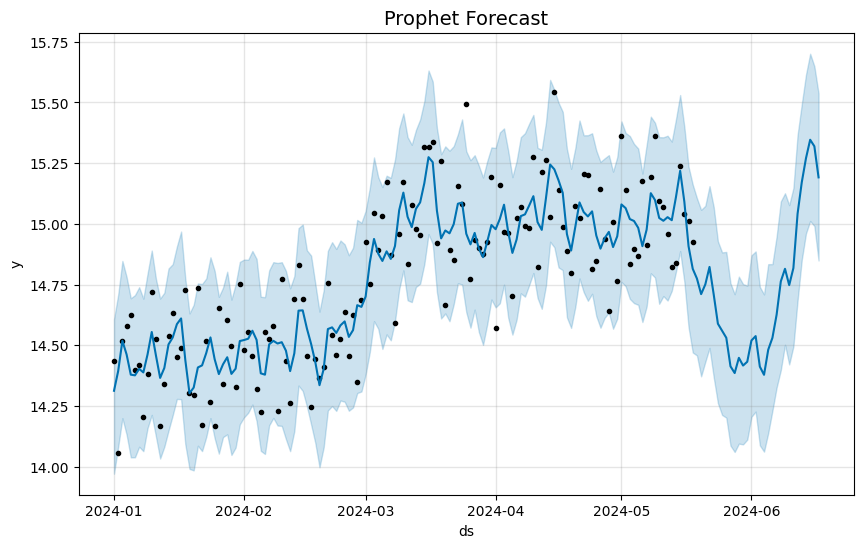

In [70]:
import matplotlib.pyplot as plt

# Generate future dates for prediction
future = prophet_model.make_future_dataframe(periods=30, freq="D")

# Make predictions
forecast_prophet = prophet_model.predict(future)

# Plot forecast
fig, ax = plt.subplots(figsize=(10, 6))
prophet_model.plot(forecast_prophet, ax=ax)
ax.set_title("Prophet Forecast", fontsize=14)
plt.show()


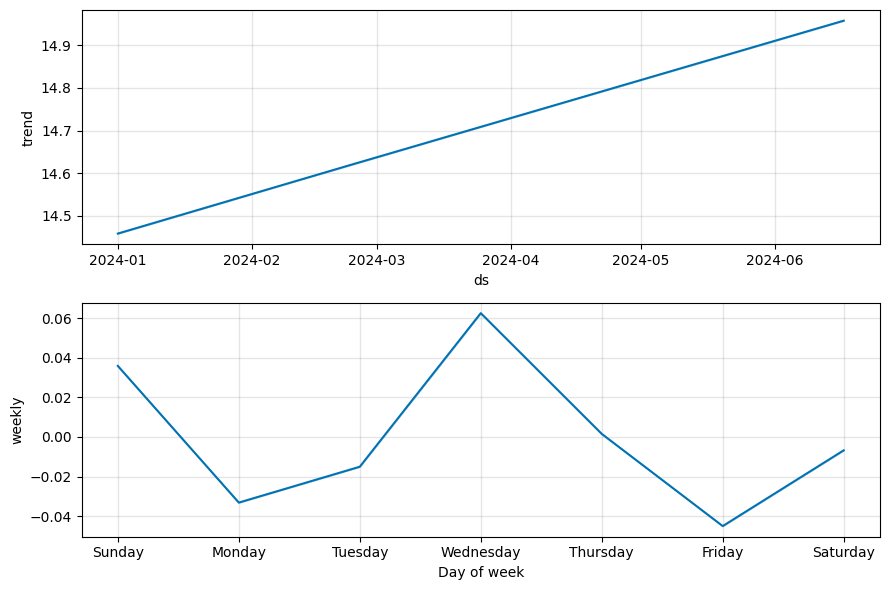

In [64]:
fig = prophet_model.plot_components(forecast)


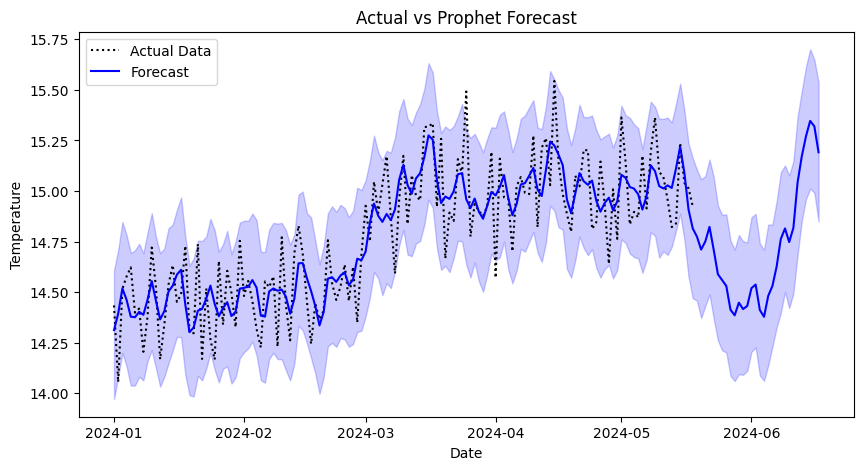

In [71]:
import matplotlib.pyplot as plt

# Plot actual data
plt.figure(figsize=(10, 5))
plt.plot(df_resampled['ds'], df_resampled['y'], label="Actual Data", color='black', linestyle='dotted')

# Plot forecast
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label="Forecast", color='blue')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='blue', alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.title("Actual vs Prophet Forecast")
plt.show()


